# Read data

In [1]:
#Libraries
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline
import datetime
datenow= datetime.datetime.now()
from numpy import sin,cos,exp,sqrt,pi
import scipy

In [2]:
#Reads data
data=pd.read_csv('data/DATALOG3.TXT', sep='\t',header=None, names = ["Day", "Time", "Temp_22", "Hum_22"], parse_dates=[['Day', 'Time']],dayfirst=True)
data=data.set_index("Day_Time")
data2=pd.read_csv('data/DATALOG4.TXT', sep='\t',header=None, names = ["Day", "Time", "Temp_22", "Hum_22", "Temp_ds"], parse_dates=[['Day', 'Time']],dayfirst=True)
data2=data2.set_index("Day_Time")
data4=pd.read_csv('data/DATALOG5.TXT', sep='\t',header=None, names = ["Day", "Time", "Temp_22", "Hum_22", "Temp_11", "Hum_11", "Temp_ds", "Rain","Light"], parse_dates=[['Day', 'Time']],dayfirst=True)
data4=data4.set_index("Day_Time")
data5=pd.read_csv('data/DATALOG7.TXT', sep='\t',header=None, names = ["Day", "Time", "Temp_22", "Hum_22", "Temp_11", "Hum_11", "Temp_bmp", "P_bmp", "Temp_ds", "Rain","Light"], parse_dates=[['Day', 'Time']],dayfirst=True)
data5=data5.set_index("Day_Time")
data6=pd.read_csv('data/DATALOG8.TXT', sep='\t',header=None, names = ["Day", "Time", "Temp_22", "Hum_22", "Temp_11", "Hum_11", "Temp_bmp", "P_bmp", "Temp_ds", "Rain","Light", "Rain2"], parse_dates=[['Day', 'Time']],dayfirst=True)
data6=data6.set_index("Day_Time")
data7=pd.read_csv('data/DATALOG9.TXT', sep='\t',header=None, names = ["Day", "Time", "Temp_22", "Hum_22", "Temp_11", "Hum_11", "Temp_bmp", "P_bmp", "Temp_ds", "Rain","Light", "Rain2","Light2"], parse_dates=[['Day', 'Time']],dayfirst=True)
data7=data7.set_index("Day_Time")
data8=pd.read_csv('data/DATA10.TXT', sep='\t',header=None, names = ["Day", "Time", "Temp_22", "Hum_22", "Temp_11", "Hum_11", "Temp_bmp", "P_bmp", "Temp_ds", "Rain","Light", "Rain2","Light2", "IR"], parse_dates=[['Day', 'Time']],dayfirst=True)
data8=data8.set_index("Day_Time")
data9=pd.read_csv('data/DATA11.TXT', sep='\t',header=None, names = ["Day", "Time", "Temp_22", "Hum_22", "Temp_11", "Hum_11", "Temp_bmp", "P_bmp", "Temp_ds", "Rain","Light", "Rain2","Light2", "IR", "Light3"], parse_dates=[['Day', 'Time']],dayfirst=True)
data9=data9.set_index("Day_Time")
data10=pd.read_csv('data/DATA12.TXT', sep='\t',header=None, names = ["Day", "Time", "Temp_22", "Hum_22", "Temp_11", "Hum_11", "Temp_bmp", "P_bmp", "Temp_ds", "Rain","Light", "Rain2","Light2", "IR", "Light3", "R", "G", "B", "C", "Color_Temp", "Lux"], parse_dates=[['Day', 'Time']],dayfirst=True)
data10=data10.set_index("Day_Time")
data11=pd.read_csv('data/DATA13.TXT', sep='\t',header=None, names = ["Day", "Time", "Temp_22", "Hum_22", "Temp_11", "Hum_11", "Temp_bmp", "P_bmp", "Temp_ds", "Rain","Light", "Rain2","Light2", "IR", "Light3", "R", "G", "B", "C", "Color_Temp", "Lux", "UV_an", "Lux_1145","IR_1145","UV_1145"], parse_dates=[['Day', 'Time']],dayfirst=True)
data11["Day_Time"]=pd.to_datetime(data11["Day_Time"],errors='coerce',dayfirst=True)
data11=data11.set_index("Day_Time")
data12=pd.read_csv('data/DATA14.TXT', sep='\t',header=None, names = ["Day", "Time", "Temp_22", "Hum_22", "Temp_11", "Hum_11", "Temp_bmp", "P_bmp", "Temp_ds", "Rain","Light", "Rain2","Light2", "IR", "Light3", "UV_an","R", "G", "B", "C", "Color_Temp", "Lux",  "Lux_1145","IR_1145","UV_1145"], parse_dates=[['Day', 'Time']],dayfirst=True)
data12=data12.set_index("Day_Time")
data13=pd.read_csv('data/DATA15.TXT', sep='\t',header=None, names = ["Day", "Time", "Temp_22", "Hum_22", "Temp_11", "Hum_11", "Temp_bmp", "P_bmp", "Temp_ds", "Rain","Light", "Rain2","Light2", "IR", "Light3", "UV_an","R", "G", "B", "C", "Color_Temp", "Lux",  "Lux_1145","IR_1145","UV_1145"], parse_dates=[['Day', 'Time']],dayfirst=True,usecols=np.arange(25))
data13["Day_Time"]=pd.to_datetime(data13["Day_Time"],errors='coerce',dayfirst=True)
data13=data13.set_index("Day_Time")



In [57]:
data_tot=data.append(data2).append(data4).append(data5).append(data6).append(data7).append(data8).append(data9).append(data10).append(data11).append(data12).append(data13)


In [58]:
#Cleans data from faulty inputs from sensors

for a in data_tot.columns:
    data_tot[a]=pd.to_numeric(data_tot[a], errors='coerce') #some values are read as not numeric, forces them to be numeric
    data_tot[a]= data_tot[a].where(((data_tot[a]>-50)), other=np.nan) #values <-50 should all be faulty; I also use -200 for nan
data_tot ["P_bmp"]= data_tot["P_bmp"].where(((data_tot.P_bmp>95000)&(data_tot.P_bmp<105000))|(data_tot.P_bmp==np.nan), other=np.nan)
data_tot ["Hum_11"]= data_tot["Hum_11"].where(((data_tot["Hum_11"]<101)), other=np.nan)
data_tot ["Temp_ds"]= data_tot["Temp_ds"].where(((data_tot["Temp_ds"]<101)), other=np.nan)
data_tot["Temp_bmp"] = data_tot["Temp_bmp"].where((np.not_equal(data_tot.Temp_bmp,0.0))|(data_tot.Temp_bmp==np.nan) , other=np.nan)
data_tot=data_tot.loc['2017-04-10':] #some datetime are wrong and antecedent the measuring window

data_tot.describe().T

,count,mean,std,min,25%,50%,75%,max
B,18074.0,7862.254897,8964.307246,0.00,0.00,5924.00,12755.00,52699.00
C,18074.0,17154.712405,19426.538015,0.00,3.00,13039.00,28042.00,65535.00
Color_Temp,18074.0,21964.065287,14241.008573,0.00,10057.00,17742.00,40943.00,65499.00
G,18074.0,7369.598871,8689.653139,0.00,0.00,5291.50,11614.75,52143.00
Hum_11,49000.0,35.197796,26.370440,0.00,11.00,19.00,60.00,95.00
Hum_22,52491.0,49.252034,6.857747,0.00,45.00,50.50,54.10,70.10
IR,39791.0,478.973587,433.719366,39.00,69.00,151.00,968.00,1023.00
IR_1145,6014.0,406.305288,182.876400,0.00,254.00,340.00,521.00,1218.00
Light,33826.0,352.431148,376.133345,3.00,76.00,109.00,812.00,974.00
Light2,46066.0,848.638779,152.309200,174.00,732.00,860.00,999.00,1021.00


In [59]:
#resample every hour
data_tot_h0=data_tot.resample("1H").mean()
data_tot_h0.dropna(how="all",inplace=True)

In [60]:
#Reads Wind
data_wind0=pd.read_csv('data/WIND.TXT', sep='\t',header=None, names = ["Day", "Time","Wind"])
data_wind1=pd.read_csv('data/WIND_2.TXT', sep='\t',header=None, names = ["Day", "Time","Wind"])
data_wind2=pd.read_csv('data/WIND_3.TXT', sep='\t',header=None, names = ["Day", "Time","Wind"])
data_wind_0=data_wind0.append(data_wind1).append(data_wind2)
data_wind_0["delta_t"]=300000   #5min
# from arduino program:
# float velocity=float(turns_write)/float(time_wind1-time_wind0)*float(1000./4.*10.);
data_wind_0["speed"]=data_wind_0.Wind*1000./4.*10.300000
#this one has delta_t and speed
data_wind3=pd.read_csv('data/WIND_4.TXT', sep='\t',header=None, names = ["Day", "Time","Wind","delta_t","speed"])
data_wind=data_wind_0.append(data_wind3)

data_wind["Day_Time_0"]=data_wind.Day.map(str)+" "+data_wind.Time.map(str)
data_wind.dropna(how="any")
data_wind["Day_Time"]=pd.to_datetime(data_wind.Day_Time_0,format= '%d.%m.%Y %H:%M:%S',errors="coerce")
#data_wind=data_wind.set_index("Day_Time")
#data_wind.Day_Time
#data_wind
data_wind=data_wind.set_index("Day_Time")
data_wind=data_wind.drop(["Day","Time","Day_Time_0"],axis=1)
#data_wind
# I sum the counts
data_wind_h=data_wind.resample("1H").sum()
#4 giri al sec sono 10 km/h
#1 ora=3600 secondi
data_wind_h["Speed"]=data_wind_h.Wind/3600/4*10

data_wind["time"]=data_wind.index
data_wind["delta_t"]=data_wind.time - data_wind.time.shift(1)
data_wind["Speed"]=data_wind.Wind/4*10/data_wind.delta_t.astype('timedelta64[s]')
data_wind.dropna(how="any",inplace=True);
data_wind.index=pd.to_datetime(data_wind.index, errors='coerce')
data_wind=data_wind[(data_wind.index.year==2017) & (data_wind.index.month>4)]
#print(data_wind.describe())
#print(data_wind_h.describe())


In [61]:
#concatenates sensors + wind hourly data
data_tot_h = pd.concat([data_tot_h0,data_wind_h.drop(["Wind","delta_t"],axis=1)])
#print(data_tot_h.head())
#data_tot_h.describe(include=[np.number]).T
data_tot_h.describe().T



,count,mean,std,min,25%,50%,75%,max
B,1508.0,7.909783e+03,8.739411e+03,0.000000,0.250000,6116.791667,12985.666667,4.034783e+04
C,1508.0,1.726129e+04,1.896367e+04,0.000000,3.000000,13391.125000,28848.666667,6.553500e+04
Color_Temp,1508.0,2.206285e+04,1.256752e+04,0.000000,10903.645833,18875.416667,34017.009615,5.843545e+04
G,1508.0,7.415872e+03,8.445091e+03,0.000000,0.166667,5479.333333,12135.125000,3.897517e+04
Hum_11,3675.0,3.504761e+01,2.682877e+01,2.347826,10.916667,17.727273,61.916667,9.500000e+01
Hum_22,4072.0,4.845794e+01,6.896612e+00,14.500000,43.760227,49.586190,53.377083,6.902500e+01
IR,2999.0,4.711865e+02,4.251798e+02,40.666667,69.791667,173.250000,966.142157,1.015500e+03
IR_1145,501.0,4.099243e+02,1.795886e+02,252.916667,253.666667,341.181818,524.916667,1.074375e+03
Light,2591.0,3.667293e+02,3.744696e+02,7.000000,82.000000,114.250000,819.208333,9.682500e+02
Light2,3477.0,8.467173e+02,1.515388e+02,285.857143,726.000000,849.250000,999.250000,1.021000e+03


In [83]:
#Max, min, avg temp per day, after rolling median to cut outliers away
#PTH_median=pd.rolling_median(data_tot[["Temp_11","Temp_ds","Temp_bmp","P_bmp","Hum_11","Rain","Rain2"]],3) deprecated
PTH_median=data_tot[["Temp_11","Temp_ds","Temp_bmp","P_bmp","Hum_11","Hum_22","Rain","Rain2"]].rolling(window=3,center=False).median()
PTH_median.dropna(how="all",inplace=True)
wind_d=data_tot_h[["Speed",]].resample("1D").mean()
#PTHw=pd.concat([PTH_median,wind_d])
PTH_max=PTH_median.resample("1D").max()
PTH_min=PTH_median.resample("1D").min()
PTH_avg=PTH_median.resample("1D").mean()

#change col names, useful for when we merge dataframes
PTH_avg.rename(columns=lambda x: x+"_avg", inplace=True)
PTH_min.rename(columns=lambda x: x+"_min", inplace=True)
PTH_max.rename(columns=lambda x: x+"_max", inplace=True)
PTH_tot=pd.concat([PTH_min,PTH_avg,PTH_max,wind_d],axis=1)

PTH_tot.tail().T
#PTH_avg.tail().T
#PTH_min.index

Day_Time,2017-10-11 00:00:00,2017-10-12 00:00:00,2017-10-13 00:00:00,2017-10-14 00:00:00,2017-10-15 00:00:00
Temp_11_min,11.000000,12.000000,11.000000,10.000000,10.000000
Temp_ds_min,13.060000,14.190000,13.310000,12.310000,12.750000
Temp_bmp_min,20.840000,21.400000,20.930000,20.100000,20.400000
P_bmp_min,101909.360000,102012.270000,102274.630000,102373.770000,102391.250000
Hum_11_min,62.000000,64.000000,66.000000,71.000000,74.000000
Hum_22_min,55.600000,56.000000,56.700000,60.600000,62.000000
Rain_min,812.000000,965.000000,967.000000,969.000000,971.000000
Rain2_min,6.000000,6.000000,7.000000,6.000000,6.000000
Temp_11_avg,13.631579,14.083916,13.391608,12.371930,12.751020
Temp_ds_avg,16.228316,16.636538,16.102063,15.270421,15.407592


# Comparison with ilmeteo.it e 3bmeteo.it

I have daily data from ilmeteo.it e 3bmeteo.it:

https://www.ilmeteo.it/portale/archivio-meteo/Trieste

https://www.3bmeteo.com/meteo/trieste/storico

In [63]:
#dati from ilmeteo.it
ilmeteo_aprile=pd.read_csv('data/Trieste-2017-Aprile.csv', sep=";")
ilmeteo_maggio=pd.read_csv('data/Trieste-2017-Maggio.csv', sep=";")
ilmeteo_giugno=pd.read_csv('data/Trieste-2017-Giugno.csv', sep=";")
ilmeteo_luglio=pd.read_csv('data/Trieste-2017-Luglio.csv', sep=";")
ilmeteo_agosto=pd.read_csv('data/Trieste-2017-Agosto.csv', sep=";")
ilmeteo_settembre=pd.read_csv('data/Trieste-2017-Settembre.csv', sep=";")
ilmeteo_ottobre=pd.read_csv('data/Trieste-2017-Ottobre.csv', sep=";")
ilmeteo=ilmeteo_aprile.append(ilmeteo_maggio).append(ilmeteo_giugno).append(ilmeteo_luglio).append(ilmeteo_agosto).append(ilmeteo_settembre).append(ilmeteo_ottobre)
#ilmeteo.set_index("DATA",inplace=True)
#ilmeteo.dropna(inplace=True,how="all")
ilmeteo.set_index(pd.to_datetime(ilmeteo.DATA, format='%d/%m/%Y'),inplace=True)
ilmeteo.drop(["DATA","LOCALITA"],inplace=True,axis=1)
ilmeteo.tail()

,TMEDIA °C,TMIN °C,TMAX °C,PUNTORUGIADA °C,UMIDITA %,VISIBILITA km,VENTOMEDIA km/h,VENTOMAX km/h,RAFFICA km/h,PRESSIONESLM mb,PRESSIONEMEDIA mb,PIOGGIA mm,FENOMENI
DATA,,,,,,,,,,,,,
2017-10-11,16.0,13.0,19.0,13.0,85.0,19.0,1.0,4.0,0.0,1022.0,0.0,0.0,NaN
2017-10-12,16.0,13.0,21.0,14.0,84.0,21.0,1.0,4.0,0.0,1024.0,0.0,0.0,pioggia
2017-10-13,16.0,13.0,19.0,13.0,85.0,15.0,0.0,4.0,0.0,1025.0,0.0,0.0,NaN
2017-10-14,15.0,12.0,19.0,13.0,89.0,8.0,1.0,4.0,0.0,1027.0,0.0,0.0,NaN
2017-10-15,15.0,13.0,18.0,14.0,92.0,16.0,1.0,4.0,0.0,1027.0,0.0,0.0,nebbia


In [64]:
#dati from 3bmeteo.it
bmeteo_aprile=pd.read_csv('data/3bmeteo_aprile2017.csv')
bmeteo_maggio=pd.read_csv('data/3bmeteo_maggio2017.csv')
bmeteo_giugno=pd.read_csv('data/3bmeteo_giugno2017.csv')
bmeteo_luglio=pd.read_csv('data/3bmeteo_luglio2017.csv')
bmeteo_agosto=pd.read_csv('data/3bmeteo_agosto2017.csv')
bmeteo_settembre=pd.read_csv('data/3bmeteo_settembre2017.csv')
bmeteo_ottobre=pd.read_csv('data/3bmeteo_ottobre2017.csv')
bmeteo=bmeteo_aprile.append(bmeteo_maggio).append(bmeteo_giugno).append(bmeteo_luglio).append(bmeteo_agosto).append(bmeteo_settembre).append(bmeteo_ottobre).reset_index()
bmeteo.set_index(pd.to_datetime(bmeteo.date,unit='ms'),inplace=True)
bmeteo.set_index(pd.to_datetime(bmeteo.index).strftime('%D'),inplace=True) 
bmeteo.drop(["index","date"],inplace=True,axis=1)
for a in ("prec","tmin","tmax"):
    bmeteo[a]=pd.to_numeric(bmeteo[a], errors='coerce') #some values are read as not numeric, forces them to be numeric

bmeteo.tail(30)

,prec,tmin,tmax,bullet,color,um
10/02/17,0,15.0,20.0,/images/icone/italia_2014/sereno.png,#1461A1,mm
10/03/17,5,15.0,18.0,/images/icone/italia_2014/pioggia_30.png,#1461A1,mm
10/04/17,0,16.0,21.0,/images/icone/italia_2014/nuvoloso_70.png,#1461A1,mm
10/05/17,4,18.0,20.0,/images/icone/italia_2014/pioviggine_30.png,#1461A1,mm
10/06/17,2,13.0,18.0,/images/icone/italia_2014/var_rovesci_30.png,#1461A1,mm
10/07/17,0,13.0,18.0,/images/icone/italia_2014/poco_nuvoloso.png,#1461A1,mm
10/08/17,0,15.0,19.0,/images/icone/italia_2014/parzialmente_nuvolos...,#1461A1,mm
10/09/17,3,14.0,19.0,/images/icone/italia_2014/var_no_prec.png,#1461A1,mm
10/10/17,0,15.0,19.0,/images/icone/italia_2014/parzialmente_nuvolos...,#1461A1,mm
10/11/17,0,16.0,19.0,/images/icone/italia_2014/poco_nuvoloso.png,#1461A1,mm


In [84]:
#merge all dataframes together
all_daily = pd.concat([PTH_tot, bmeteo,ilmeteo],axis=1)
all_daily.tail(30).T

,2017-10-02 00:00:00,2017-10-03 00:00:00,2017-10-04 00:00:00,2017-10-05 00:00:00,2017-10-06 00:00:00,2017-10-07 00:00:00,2017-10-08 00:00:00,2017-10-09 00:00:00,2017-10-10 00:00:00,2017-10-11 00:00:00,...,2017-10-22 00:00:00,2017-10-23 00:00:00,2017-10-24 00:00:00,2017-10-25 00:00:00,2017-10-26 00:00:00,2017-10-27 00:00:00,2017-10-28 00:00:00,2017-10-29 00:00:00,2017-10-30 00:00:00,2017-10-31 00:00:00
Temp_11_min,12,12,13,14,10,9,10,11,12,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp_ds_min,13.75,14.75,15.75,16.94,13.13,10.75,12.44,13.25,14.56,13.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp_bmp_min,18.85,21.63,22.88,24.29,18.19,17.39,19.83,20.11,21.58,20.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
P_bmp_min,101945,101563,101988,100756,100480,101357,101141,101352,101461,101909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hum_11_min,25,67,59,64,23,32,46,48,50,62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hum_22_min,48.3,51.8,52.5,54.4,50.4,49.7,48.1,56.3,55,55.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rain_min,967,829,396,987,983,984,466,986,988,812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rain2_min,259,15,3,4,5,9,4,5,5,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp_11_avg,14.0316,13.8497,15.5245,15.6092,14.3007,11.586,13.6853,14.4476,15.0105,13.6316,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temp_ds_avg,16.2237,16.1624,18.5025,19.2183,16.7981,14.4529,16.4201,17.4491,17.5976,16.2283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Temperature

Let's first compare the average temperature

MSE DHT11:  2.65788333505
MSE BMP:  33.417879736
MSE DS18B20:  1.40221898424


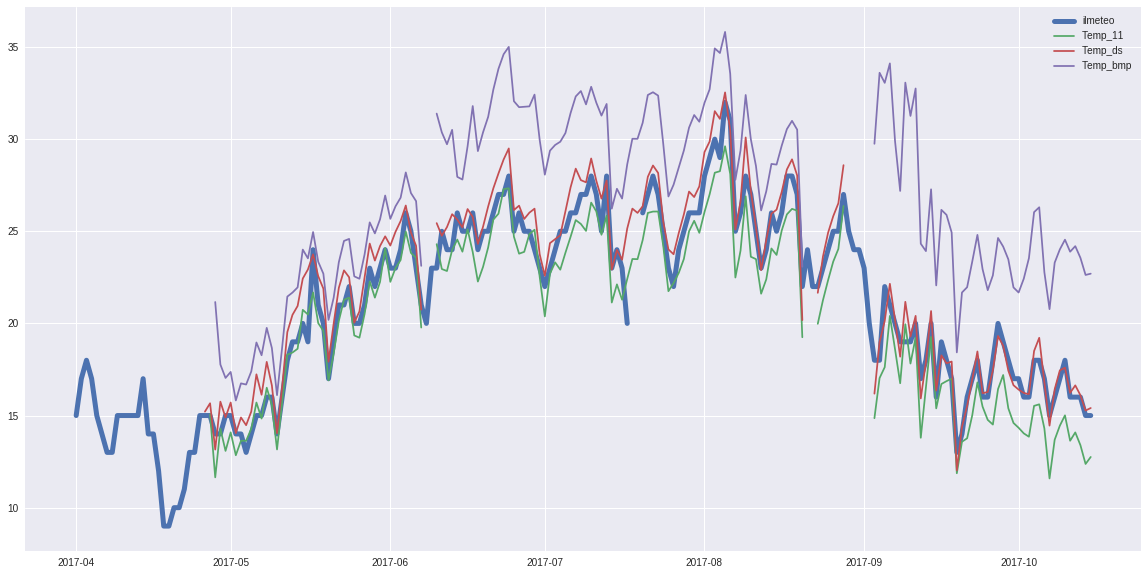

In [66]:
#print(ilmeteo.columns)
f, ax = plt.subplots(1,1,figsize=(20,10))
#T media
plt.plot(all_daily["TMEDIA °C"],label="ilmeteo",linewidth=5)
plt.plot(all_daily.Temp_11_avg,label="Temp_11")
plt.plot(all_daily.Temp_ds_avg,label="Temp_ds")
plt.plot(all_daily.Temp_bmp_avg,label="Temp_bmp")
plt.legend()

#computes the MSE
from sklearn.metrics import mean_squared_error as mse
all_t_avg=all_daily[["TMEDIA °C","Temp_11_avg","Temp_ds_avg","Temp_bmp_avg"]].dropna(how="any")
print ("MSE DHT11: ", mse(all_t_avg["TMEDIA °C"],all_t_avg["Temp_11_avg"]))
print ("MSE BMP: ", mse(all_t_avg["TMEDIA °C"],all_t_avg["Temp_bmp_avg"]))
print ("MSE DS18B20: ", mse(all_t_avg["TMEDIA °C"],all_t_avg["Temp_ds_avg"]))

It seems that the sensor DS18B200 performs best. Let's keep only that one and plot the min and max T for every day.

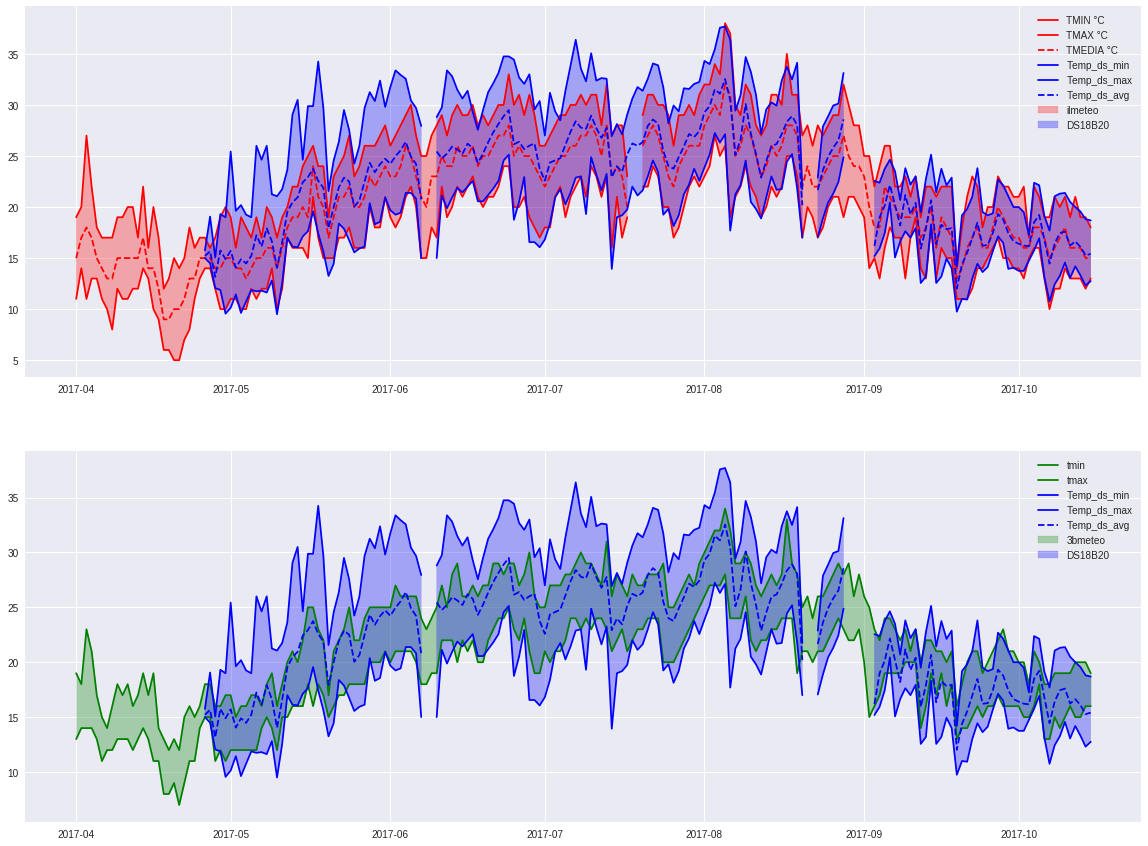

In [67]:
col=["r","g","b"]
f, ax = plt.subplots(2,1,figsize=(20,15))
ax=ax.flatten()
ax[0].fill_between(all_daily.index,all_daily["TMIN °C"],all_daily["TMAX °C"],alpha=0.3,label="ilmeteo",color=col[0])
ax[0].plot(all_daily["TMIN °C"],color=col[0])
ax[0].plot(all_daily["TMAX °C"],color=col[0])
ax[0].plot(all_daily["TMEDIA °C"],"--",color=col[0])
ax[1].fill_between(all_daily.index,all_daily["tmin"],all_daily["tmax"],alpha=0.3,label="3bmeteo",color=col[1])
ax[1].plot(all_daily["tmin"],color=col[1])
ax[1].plot(all_daily["tmax"],color=col[1])
for i in (0,1):
    ax[i].fill_between(all_daily.index,all_daily["Temp_ds_min"],all_daily["Temp_ds_max"],alpha=0.3,label="DS18B20",color=col[2])
    ax[i].plot(all_daily["Temp_ds_min"],color=col[2])
    ax[i].plot(all_daily["Temp_ds_max"],color=col[2])
    ax[i].plot(all_daily["Temp_ds_avg"],"--",color=col[2])
ax[0].legend();
ax[1].legend();

Sensor DS18B20 finds values a little more extrme than the reported ones, but the agreement seems overall good.

## Humidity 

Let's now switch to the Humidity, which is provided by DHT11 (external) and DHT22 (internal).

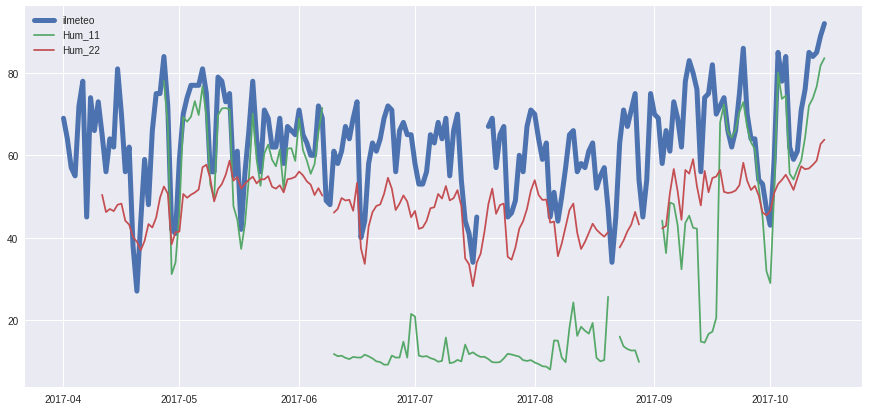

In [68]:
#H media
%matplotlib inline
#%matplotlib notebook
#%matplotlib qt  # wx, gtk, osx, tk, notebook
f, ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(all_daily["UMIDITA %"],label="ilmeteo",linewidth=5)
ax.plot(all_daily["Hum_11_avg"],label="Hum_11")
ax.plot(all_daily["Hum_22_avg"],label="Hum_22")
ax.legend()


Unfortunately the cheap DHT11 sensor broke around 10/6. I replaced it on 17/9. Let's remove all wrong data.

In [70]:
from datetime import datetime
mask=(all_daily.index >= datetime(2017,6,10)) & (all_daily.index <= datetime(2017,9,17))
all_daily.Hum_11_avg[mask]=np.nan
all_daily.Hum_11_min[mask]=np.nan
all_daily.Hum_11_max[mask]=np.nan
mask1=(data_tot.index >= datetime(2017,6,10)) & (data_tot.index <= datetime(2017,9,17))
data_tot.Hum_11[mask1]=np.nan
mask2=(data_tot_h.index >= datetime(2017,6,10)) & (data_tot_h.index <= datetime(2017,9,17))
data_tot_h.Hum_11[mask2]=np.nan

/home/baruselli/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/baruselli/.local/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/baruselli/.local/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


SQRT MSE DHT11:  7.35406415779
SQRT MSE DHT22:  17.2028008096


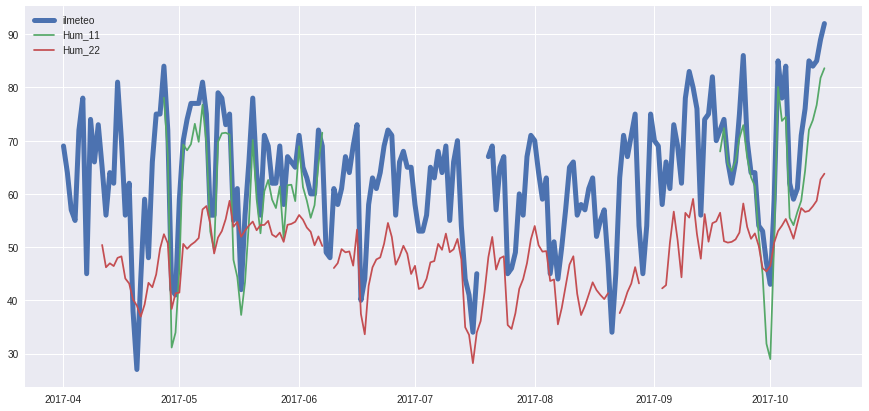

In [75]:
f, ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(all_daily["UMIDITA %"],label="ilmeteo",linewidth=5)
ax.plot(all_daily["Hum_11_avg"],label="Hum_11")
ax.plot(all_daily["Hum_22_avg"],label="Hum_22")
ax.legend()
h11_avg=all_daily[["UMIDITA %","Hum_11_avg"]].dropna(how="any")
print ("SQRT MSE DHT11: ", np.sqrt(mse(h11_avg["UMIDITA %"],h11_avg["Hum_11_avg"])))
h22_avg=all_daily[["UMIDITA %","Hum_22_avg"]].dropna(how="any")
print ("SQRT MSE DHT22: ", np.sqrt(mse(h22_avg["UMIDITA %"],h22_avg["Hum_22_avg"])))

After removing wrong measurements, the agreement of DHT11 is relatively good.

For DHT22 it is not so good, as it measures the inside humidity.

## Pressure

SQRT MSE P_BMP:  2.00595411157


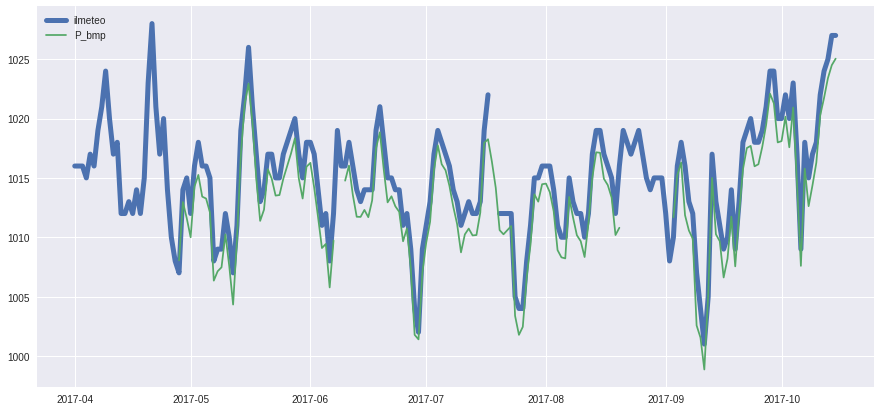

In [81]:
#P media
f, ax = plt.subplots(1,1,figsize=(15,7))
ax.plot(all_daily["PRESSIONESLM mb"],label="ilmeteo",linewidth=5)
ax.plot(all_daily.P_bmp_avg/100,label="P_bmp")
ax.legend()

p_avg=all_daily[["PRESSIONESLM mb","P_bmp_avg"]].dropna(how="any")
print ("SQRT MSE P_BMP: ", np.sqrt(mse(p_avg["PRESSIONESLM mb"],p_avg["P_bmp_avg"]/100)))


Here the agreement is good.

## Wind

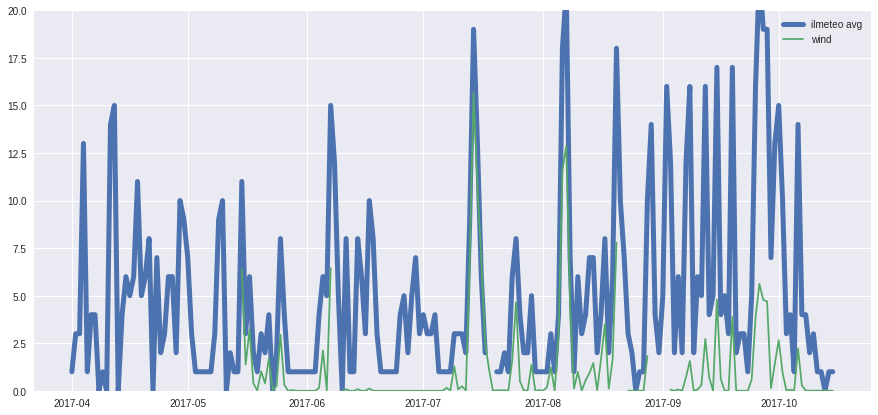

In [90]:
f, ax = plt.subplots(1,1,figsize=(15,7))
#Wind
ax.plot(all_daily["VENTOMEDIA km/h"],label="ilmeteo avg",linewidth=5)
#ax.plot(all_daily["VENTOMAX km/h"],label="ilmeteo max",linewidth=2)
ax.plot(all_daily["Speed"],label="wind")
ax.set_ylim(0,20)
ax.legend()


In [ ]:
ilmeteo.FENOMENI.unique()

In [ ]:
def pioggia(row):
    if (row["FENOMENI"]=="pioggia "):
        return 0
    elif (row["FENOMENI"]=="pioggia temporale "):
        return 0
    else:
        return 1
ilmeteo["pioggia"]=ilmeteo.apply (lambda row: pioggia(row),axis=1)

In [ ]:
plt.plot(ilmeteo.pioggia,'ro')
plt.plot(PTH_min.Rain_01,'bp')
test_pioggia=pd.concat([ilmeteo.pioggia,PTH_min.Rain_01],axis=1).dropna()
from sklearn.metrics import confusion_matrix
print(confusion_matrix(test_pioggia.pioggia,test_pioggia.Rain_01))

In [ ]:
check_Tavg=pd.concat([ilmeteo["TMEDIA °C"],PTH_avg],axis=1).dropna(how="any")
from sklearn.metrics import mean_absolute_error,mean_squared_error

for metric in (error_predict,mean_absolute_error):
    for sensor in ("Temp_11","Temp_ds","Temp_bmp"):
        print(metric(check_Tavg["TMEDIA °C"],check_Tavg[sensor]),sensor,metric)


In [ ]:
check_Tavg["TMEDIA °C"].shape
#PTH_avg.Temp_11.shape

In [ ]:
bmeteo.prec.plot()  

In [ ]:
bmeteo.date/86400

In [ ]:
ls

In [ ]:
!tail DATA13.TXT

In [ ]:
data_tot.tail(24)

In [ ]:
matplotlib.rcParams['figure.figsize'] = (18, 12)
data_tot_luglio=data_tot_h[(data_tot_h.index.month==8) & (data_tot_h.index.day>14)& (data_tot_h.index.day<16)]
data_tot_luglio.Light.dropna().plot()
data_tot_luglio.Light2.dropna().plot()
data_tot_luglio.Light3.dropna().plot()
#data_tot_luglio.UV_an.dropna().plot()
#data_tot_luglio.IR.dropna().plot()
#data_tot_luglio.Rain.dropna().plot()
#data_tot_luglio.Rain2.dropna().plot()
plt.legend()

In [ ]:
#plots all series
f, ax = plt.subplots(data_tot_h.columns.shape[0]//2+1,2,figsize=(12,35))
for i,a in enumerate(data_tot_h.columns):
    try:
        data_tot[a].dropna().plot(ax=ax.flatten()[i])
#        data_tot[a].dropna().rolling(12).mean().plot(ax=ax.flatten()[i])
    except:
        pass
    data_tot_h[a].dropna().plot(ax=ax.flatten()[i],title=str(a))
    ax.flatten()[i].set_xlabel("")
plt.tight_layout()

In [ ]:
#compares the three T sensors
data_tot_h.Temp_11.dropna().plot()
data_tot_h.Temp_ds.dropna().plot()
data_tot_h.Temp_bmp.dropna().plot()
#data_tot_h.Temp_22.dropna().plot()
plt.xlim(pd.Timestamp('2017-04-27'),datenow);
#data_tot.Temp_bmp.describe()
#show(to_bokeh())



In [ ]:
#hourly average
f, ax = plt.subplots(2,2,figsize=(10,8))
ax=ax.flatten()
data_tot_h.Temp_ds.groupby(data_tot_h.index.hour).mean().plot(style='or',ax=ax[0])
data_tot_h.Temp_bmp.groupby(data_tot_h.index.hour).mean().plot(style='ob',ax=ax[0])
data_tot_h.Temp_11.groupby(data_tot_h.index.hour).mean().plot(style='ok',ax=ax[0])
data_tot_h.Temp_22.groupby(data_tot_h.index.hour).mean().plot(style='og',ax=ax[0])
data_tot_h.Hum_11.groupby(data_tot_h.index.hour).mean().plot(style='or',ax=ax[2])
data_tot_h.Hum_11.groupby(data_tot_h.index.hour).max().plot(style='-r',ax=ax[2])
data_tot_h.Hum_11.groupby(data_tot_h.index.hour).min().plot(style='-r',ax=ax[2])
data_tot_h.P_bmp.groupby(data_tot_h.index.hour).mean().plot(style='ob',ax=ax[3])
data_tot_h.P_bmp.groupby(data_tot_h.index.hour).max().plot(style='-b',ax=ax[3])
data_tot_h.P_bmp.groupby(data_tot_h.index.hour).min().plot(style='-b',ax=ax[3])
ax[0].legend(loc='lower center')
#data_tot_h.Hum_11.groupby(data_tot_h.index.hour).mean().plot(style='o',secondary_y=True)
#data_tot_h.Hum_22.groupby(data_tot_h.index.hour).mean().plot(style='o',secondary_y=True)
#plt.legend()
#daily average
colors=["r","b","k","g"]
for i,a in enumerate(("Temp_ds","Temp_bmp","Temp_11","Temp_22")):
    data_tot_h[a].groupby(data_tot_h.index.dayofyear).mean().plot(ax=ax[1],color=colors[i])
    data_tot_h[a].groupby(data_tot_h.index.dayofyear).max().plot(ax=ax[1],color=colors[i])
    data_tot_h[a].groupby(data_tot_h.index.dayofyear).min().plot(ax=ax[1],color=colors[i])
#data_tot_h.Temp_ds.groupby(data_tot_h.index.dayofyear).max().plot(ax=ax[1])
#data_tot_h.Temp_bmp.groupby(data_tot_h.index.dayofyear).mean().plot(ax=ax[1])
#data_tot_h.Temp_11.groupby(data_tot_h.index.dayofyear).mean().plot(ax=ax[1])
#data_tot_h.Temp_22.groupby(data_tot_h.index.dayofyear).mean().plot(ax=ax[1])

In [ ]:
for a in ("R","G","B"):
    data_tot_h[a].groupby(data_tot_h.index.hour).mean().plot(style="o"+a.lower())

In [ ]:
#still hourly average
f, ax = plt.subplots(2,2,figsize=(10,6))
ax=ax.flatten()
data_tot_h.Light.groupby(data_tot_h.index.hour).mean().plot(style='or',ax=ax[0], label="light")
data_tot_h.Light2.groupby(data_tot_h.index.hour).mean().plot(style='ob',ax=ax[0], label="light2")
data_tot_h.IR.groupby(data_tot_h.index.hour).mean().plot(style='ok',ax=ax[0], label="IR")
data_tot_h.Light3.groupby(data_tot_h.index.hour).mean().plot(style='og',ax=ax[0], label="light3")
data_tot_h.Light.groupby(data_tot_h.index.hour).min().plot(style='or',ax=ax[1], label="light")
data_tot_h.Light2.groupby(data_tot_h.index.hour).min().plot(style='ob',ax=ax[1], label="light2")
data_tot_h.IR.groupby(data_tot_h.index.hour).min().plot(style='ok',ax=ax[1], label="IR")
data_tot_h.Light.groupby(data_tot_h.index.hour).max().plot(style='dr',ax=ax[1], label="light")
data_tot_h.Light2.groupby(data_tot_h.index.hour).max().plot(style='db',ax=ax[1], label="light2")
data_tot_h.IR.groupby(data_tot_h.index.hour).max().plot(style='dk',ax=ax[1], label="IR")
data_tot_h.Hum_11.groupby(data_tot_h.index.hour).mean().plot(style='or',ax=ax[2], label="Hum")
data_tot_h.P_bmp.groupby(data_tot_h.index.hour).mean().plot(style='ob',ax=ax[3], label="P")

ax[0].fill_between(data_tot_h.Light.groupby(data_tot_h.index.hour).mean().index,data_tot_h.Light.groupby(data_tot_h.index.hour).mean()-data_tot_h.Light.groupby(data_tot_h.index.hour).std(), data_tot_h.Light.groupby(data_tot_h.index.hour).mean()+data_tot_h.Light.groupby(data_tot_h.index.hour).std(), color='r', alpha=0.2)
ax[0].fill_between(data_tot_h.Light2.groupby(data_tot_h.index.hour).mean().index,data_tot_h.Light2.groupby(data_tot_h.index.hour).mean()-data_tot_h.Light2.groupby(data_tot_h.index.hour).std(), data_tot_h.Light2.groupby(data_tot_h.index.hour).mean()+data_tot_h.Light2.groupby(data_tot_h.index.hour).std(), color='b', alpha=0.2)
ax[0].fill_between(data_tot_h.IR.groupby(data_tot_h.index.hour).mean().index,data_tot_h.IR.groupby(data_tot_h.index.hour).mean()-data_tot_h.IR.groupby(data_tot_h.index.hour).std(), data_tot_h.IR.groupby(data_tot_h.index.hour).mean()+data_tot_h.IR.groupby(data_tot_h.index.hour).std(), color='k', alpha=0.2)
ax[3].fill_between(data_tot_h.P_bmp.groupby(data_tot_h.index.hour).mean().index,data_tot_h.P_bmp.groupby(data_tot_h.index.hour).mean()-data_tot_h.P_bmp.groupby(data_tot_h.index.hour).std(), data_tot_h.P_bmp.groupby(data_tot_h.index.hour).mean()+data_tot_h.P_bmp.groupby(data_tot_h.index.hour).std(), color='b', alpha=0.2)
ax[2].fill_between(data_tot_h.Hum_11.groupby(data_tot_h.index.hour).mean().index,data_tot_h.Hum_11.groupby(data_tot_h.index.hour).mean()-data_tot_h.Hum_11.groupby(data_tot_h.index.hour).std(), data_tot_h.Hum_11.groupby(data_tot_h.index.hour).mean()+data_tot_h.Hum_11.groupby(data_tot_h.index.hour).std(), color='r', alpha=0.2)

ax[0].legend(loc='best')
ax[2].legend()
ax[3].legend()

In [ ]:
#correlytion among variables
sns.heatmap(data_tot_h.corr(),square=True)

In [ ]:
#checks if hourly average changes correlation
sns.heatmap(abs(data_tot.corr()-data_tot_h.corr()),square=True)

In [ ]:
#data_tot_h.Temp_bmp.plot(label="T")
#data_tot_h.P_bmp.plot(label="P",secondary_y=True)
#plt.xlim(pd.Timestamp('2017-04-29'),datenow);
#plt.legend();

In [ ]:
##checks mean and std of the houry average
#Temp=pd.Series(data["Temp"]).append(data2["Temp"]).append(data3["Temp"]).append(data4["Temp"])
Temp=pd.Series(data_tot["Temp_22"])
#print(Temp.mean(), Temp.std())
#Temp.tail()
#Hum=pd.Series(data["Hum"]).append(data2["Hum"]).append(data3["Hum"]).append(data4["Hum"])
Hum=pd.Series(data_tot["Hum_22"])
#print(Hum.mean(), Hum.std())
#Hum.tail()
#every hour
#Temp_h0=Temp.resample("1H").mean()
#Temp_h=Temp_h0
Temp_h=data_tot_h["Temp_22"];
print(Temp.mean(), Temp.std())
print(Temp_h.mean(), Temp_h.std())
#print(Temp_h.head())
#Temp.plot()
#Temp_h.plot()
#Temp.rolling(100).mean().plot()
#Hum_h0=Hum.resample("1H").mean()
#Hum_h=Hum_h0[13:]
Hum_h=data_tot_h["Hum_22"]
#print(Hum_h.head())
#Hum.plot()
#Hum_h.plot()
print(Hum.mean(), Hum.std())
print(Hum_h.mean(), Hum_h.std())
#sns.boxplot(data=Temp,width=0.5)
#sns.boxplot(data=Hum,width=0.5)
#sns.tsplot(data=Temp_h)

In [ ]:
#statsmodels.graphics.tsaplots.plot_acf(Temp_h_d,lags=73,title="Temp acf")
#statsmodels.graphics.tsaplots.plot_pacf(Temp_h_d,lags=30,title="Temp pacf")
#statsmodels.graphics.tsaplots.plot_acf(Hum_h_d,lags=73,title="Hum acf")
#statsmodels.graphics.tsaplots.plot_pacf(Hum_h_d,lags=30,title="Hum pacf");

In [ ]:
#data_tot.Rain.dropna().plot()
#data_tot.Rain_01.dropna().plot(secondary_y=True)

In [ ]:
#data_tot_h.Light.dropna().plot()
#data_tot_h.Rain.dropna().plot()
#data_tot_h.Rain_01.dropna().plot(secondary_y=True)

In [ ]:
#dstart = datetime.datetime(2015,4,27)
#data_tot.Hum_11.dropna().plot()
#data_tot.Hum_22.dropna().plot()
#plt.xlim(pd.Timestamp('2017-04-27'),datenow);

In [ ]:
#data_tot.P_bmp.plot()
#data_tot.Temp_bmp.plot(secondary_y=True)
#plt.xlim(pd.Timestamp('2017-04-29'),datenow);

In [ ]:
#data_tot_h.Light.plot()
#data_tot_h.Light2.plot()
#plt.xlim(pd.Timestamp('2017-04-29'),datenow);
#plt.ylim(0,1024)

In [ ]:
#plt.scatter(x=data_tot.Light, y=data_tot.Temp_bmp)
sns.pairplot(data_tot_h[["Hum_11", "Temp_ds", "P_bmp", "Light", "Rain_01"]].dropna(how="any"),kind="reg")

In [ ]:
#plt.scatter(data_tot_h.Hum_22,data_tot_h.Temp_22.shift(periods=0))

In [ ]:
#detects the conditions for rain, at same time
cmap = sns.cubehelix_palette(as_cmap=True)
#sns.regplot("Hum_11", "Temp_ds",data_tot_h, hue="Rain")
f, ax = plt.subplots(1,2,figsize=(10,4))
points = ax[0].scatter(data_tot.Hum_11, data_tot.Temp_ds, c=data_tot.Rain, s=50, cmap=cmap,)
f.colorbar(points)
points1 = ax[1].scatter(data_tot.Hum_11, data_tot.P_bmp, c=data_tot.Rain, s=50, cmap=cmap,)
#f.colorbar(points1)
#plot_url = py.plot_mpl(f)

In [ ]:
#f, ax = plt.subplots(1,2,figsize=(10,4))
sns.lmplot("Hum_11", "Temp_ds",data_tot, col="Rain_01")

In [ ]:
sns.lmplot("Hum_11", "P_bmp",data_tot, col="Rain_01")

In [ ]:

    
error=[]
fig = plt.figure()
for shift in range(0,100):
    error.append(pred_shift(data_tot_h.Temp_ds,shift))
plt.plot(error,"o")
plt.axhline(pred_mean(data_tot_h.Temp_ds))
print(error[1], error[12],error[24],pred_mean(data_tot_h.Temp_ds))
#plot_url = py.plot_mpl(fig)



In [ ]:
plt.plot(error,"o")
plt.figure()

In [ ]:
#transform time series to df with the shifts
def series_to_df(series,n_shifts):
    cols=[]
    for i in n_shifts:
        cols.append("d"+str(i))
    dataframe=pd.DataFrame(columns=cols)
    for i in n_shifts:
        dataframe["d"+str(i)]=series.shift(i)
    return dataframe.dropna(how="any")

df_Temp=series_to_df(data_tot_h.Temp_ds,(2,1,0))
df_Temp.head()

In [ ]:
# supervised regression
df_Temp=series_to_df(data_tot_h.Temp_ds,(1,0))

X=df_Temp.ix[:,:-1]
y=df_Temp.ix[:,-1]
#print(X.head(),y.head())
X_train, X_test, y_train, y_test=train_test_split(X,y)
X_train.head()
y_train.head()
"""
svr_rbf = SVR(kernel='rbf', C=1e2, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
linear= LinearRegression()
rfr= RandomForestRegressor()
abr=AdaBoostRegressor()
#svr_pol = SVR(kernel='poly', C=1e3, degree=2)
svr_rbf.fit(X_train, y_train) 
svr_lin.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
rfr.fit(X_train, y_train)
abr.fit(X_train, y_train)
#svr_pol.fit(X_train, y_train)

y_rbf_predict_train = svr_rbf.predict(X_train)
y_rbf_predict_test =  svr_rbf.predict(X_test)
y_lin_predict_train = svr_lin.predict(X_train)
y_lin_predict_test =  svr_lin.predict(X_test)
y_linear_predict_train = linear.predict(X_train)
y_linear_predict_test =  linear.predict(X_test)
y_rfr_predict_train = rfr.predict(X_train)
y_rfr_predict_test =  rfr.predict(X_test)
y_abr_predict_train = abr.predict(X_train)
y_abr_predict_test =  abr.predict(X_test)


#y_pol_predict_train = svr_pol.predict(X_train)
#y_pol_predict_test =  svr_pol.predict(X_test)

print(error_predict(y_train,y_rbf_predict_train),error_predict(y_test,y_rbf_predict_test))
print(error_predict(y_train,y_lin_predict_train),error_predict(y_test,y_lin_predict_test))
print(error_predict(y_train,y_linear_predict_train),error_predict(y_test,y_linear_predict_test))
print(error_predict(y_train,y_rfr_predict_train),error_predict(y_test,y_rfr_predict_test))
print(error_predict(y_train,y_abr_predict_train),error_predict(y_test,y_abr_predict_test))
#print(error_predict(y_train,y_pol_predict_train),error_predict(y_test,y_pol_predict_test))

scores = cross_val_score(svr_rbf, X, y, cv=5,scoring='neg_mean_squared_error')"""

In [ ]:
#print(error[1],error[24])
#for model in (svr_rbf,svr_lin,linear,rfr,abr):
#    scores = cross_val_score(model, X, y, cv=10,scoring='neg_mean_squared_error')
#    print(sqrt(-scores).mean())

In [ ]:
#simple predictor P[T(t)]=T(t-shift)
def pred_shift(series,shift):
    series_ok=series.dropna()
    #return (sqrt(mean_squared_error(series_ok[shift:],series_ok.shift(shift)[shift:])))
    error=((series_ok.shift(shift)-series_ok)**2).dropna().sum()/((series_ok.shift(shift)-series_ok)**2).dropna().count()
    return sqrt(error)
def pred_mean(series):
    '''this is basically the std'''
    series_ok=series.dropna()
    return (sqrt(mean_squared_error(np.full(len(series_ok),series_ok.mean()),series_ok)))
   # error=((series_ok.mean()-series_ok)**2).dropna().sum()/((series_ok.mean()-series_ok)**2).dropna().count()
   # return sqrt(error)
   # return series_ok.std()
def error_predict(series1,series2):
#compare to sklearn.metrics.mean_squared_error
    error=((series1-series2)**2).sum()/((series1-series2)**2).count()
    return sqrt(error)

def pred_h_mean(series):
    '''predicts the hourly mean and gives error'''
    series_ok=series.dropna()
    h_av=series.groupby(series.index.hour).mean().values
    s2=pd.Series(index=series.index,data=h_av[series.index.hour])
    return (sqrt(mean_squared_error(s2,series_ok)))

def gen_h_mean(series,series2):
    '''predicts the hourly mean
    series is the train for getting the mean, series2 is the test (only need hour)'''
    series_ok=series.dropna()
    h_av=series.groupby(series.index.hour).mean().values
    return(pd.Series(index=series2.index,data=h_av[series2.index.hour]))

In [ ]:
#linear regression via statsmodels.api

import statsmodels.api as sm

df_Temp=series_to_df(data_tot_h.Temp_ds,(1,0))
df_Temp["hour"]=sin(df_Temp.index.hour*2*pi/24)
df_Temp["hour2"]=cos(df_Temp.index.hour*2*pi/24)
X=df_Temp.drop("d0",axis=1)
y=df_Temp["d0"]
##X_train, X_test, y_train, y_test=train_test_split(X,y)
#frac=0.9
#X_train=X.ix[:int(frac*X.shape[0]),:]
#y_train=y.ix[:int(frac*y.shape[0])]
#X_test=X.ix[int(frac*X.shape[0]):,:]
#y_test=y.ix[int(frac*y.shape[0]):]
X_train=X
y_train=y

X_train2 = sm.add_constant(X_train)
X_test2 = sm.add_constant(X_test)
#print(X_train2.head())
model = sm.OLS(y_train,X_train2)
result = model.fit()
print(result.summary())
print(result.params)


##result = sm.ols(y_train,X_train,formula="A ~ B + C").fit()

y_hat = result.predict(X_train2)
#y_hat2 = result.predict(X_test2)
#plt.scatter(X_train, y_train, alpha=0.3)
#plt.scatter(X_test, y_test, alpha=0.3,color='r')
#plt.plot(X_train2.iloc[:,1],y_hat)
#plt.plot(X_test2.iloc[:,1],y_hat2,color='r')

print(error_predict(y_hat,y_train))
print(error[1], error[12],error[24],pred_mean(data_tot_h.Temp_ds))
#print(error_predict(y_hat2,y_test))

In [ ]:
#linear regression via statsmodels.formula.api, R style
import statsmodels.formula.api as smf
df_Temp=series_to_df(data_tot_h.Temp_ds,(24,2,1,0))
#'here I add sin and cos of hour, as described below
df_Temp["hour"]=sin(df_Temp.index.hour*2*pi/24)
df_Temp["hour2"]=cos(df_Temp.index.hour*2*pi/24)
df_Temp["hour3"]=sin(df_Temp.index.hour*4*pi/24)
df_Temp["hour4"]=cos(df_Temp.index.hour*4*pi/24)
#frac=0.5
#df_Temp_train=df_Temp.ix[:int(frac*X.shape[0]),:]
#df_Temp_test=df_Temp.ix[int(frac*X.shape[0]):,:]
df_Temp_train=df_Temp

result = smf.ols("d0 ~ d1*hour + d1*hour2 +d1*hour3 + d1*hour4",df_Temp_train).fit()
print(result.summary())
print(result.params)
predict_train=result.predict(df_Temp_train)
#predict_test=result.predict(df_Temp_test)
print("train error:",error_predict(predict_train,df_Temp_train.d0))
#print("test error:",error_predict(predict_test,df_Temp_test.d0))
print("baseline predictors (1, 24):",error[1],error[24])
print(sqrt(result.mse_resid))


In [ ]:
print(result.mse_total,result.mse_resid, result.mse_model, result.ess,result.rsquared, result.ssr)
import statsmodels

f, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(result.resid,'o')
ax[1].hist(result.resid,bins=50);
#remove outliers
resid2=result.resid[abs(result.resid)<4]
for a in (result.resid,resid2):
    print(scipy.stats.normaltest(a))
    print(scipy.stats.shapiro(a))
    print(lillifors(a))
    print(scipy.stats.jarque_bera(a))
    print(scipy.stats.kstest((a-np.mean(a))/np.std(a,ddof=1), 'norm'))
    print(statsmodels.stats.stattools.durbin_watson(a))

In [ ]:
#linear regression via sklearn LinearRegression
#lasso to select features
#list of hours to fit
#-- do grid search on alfa
# other feature selesction algorithms
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statsmodels.stats.diagnostic import lillifors
from sklearn.metrics import mean_squared_error
from sklearn.covariance import EllipticEnvelope
from sklearn.preprocessing import StandardScaler

a=(np.arange(30,0,-1))
b=np.append(a,0).tolist()
#print(b)
df_Temp=series_to_df(data_tot_h.Temp_ds,b)
df_Temp["hour"]=sin(df_Temp.index.hour*2*pi/24)
df_Temp["hour2"]=cos(df_Temp.index.hour*2*pi/24)
X=df_Temp.drop("d0",axis=1)
print(X.columns)
y=df_Temp["d0"]
#X_train, X_test, y_train, y_test=train_test_split(X,y)
frac=1
X_train=X.ix[:int(frac*X.shape[0])-1,:]
y_train=y.ix[:int(frac*y.shape[0])-1]
X_test=X.ix[int(frac*X.shape[0])-1:,:]
y_test=y.ix[int(frac*y.shape[0])-1:]
#linear= LinearRegression(fit_intercept=True)
linear= Lasso(fit_intercept=True,alpha=0.05)
#linear= Ridge(fit_intercept=True,alpha=0.01)
linear.fit(X_train, y_train) 
y_linear_predict_train = linear.predict(X_train)
y_linear_predict_test =  linear.predict(X_test)
scores = cross_val_score(linear, X, y, cv=30,scoring='neg_mean_squared_error')
print("crossval: ",sqrt(-scores.mean()))
print("train: ",error_predict(y_linear_predict_train,y_train))
#print(b[abs(linear.coef_)>1e-8])
mask=abs(linear.coef_)>1e-8
print("number of features:",mask.sum(), " out of:", mask.size)
print(X.columns[mask])
print(linear.coef_[mask],linear.intercept_)
print("baseline predictors (1, 24):",error[1],error[24])

In [ ]:
#PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)
X_pca
#plt.plot(X_pca[:,0],X_pca[:,1],"o")

#Kbest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
kbest= SelectKBest(f_regression, k=5)
kbest.fit(X,y)
X_new=kbest.fit_transform(X, y)
print(kbest.scores_)
#plt.plot(X_new[:,0],y,"o")
#print(X_new)
X.columns[kbest.get_support()]
linear= LinearRegression(fit_intercept=True)
linear.fit(X_new, y) 
y_linear_predict = linear.predict(X_new)
print("Kbest train: ",error_predict(y_linear_predict,y))

#LDA only for classification
#from sklearn.lda import LDA
#lda=LDA(n_components=2)
#lda.fit(X,y)
#X_lda = lda.transform(X)
#print("llda train: ",error_predict(y_predict_lda,y))

In [ ]:
#sfruttare l'orario come feature, qui uso sklearn (in pratica e' un Fouries fit)
a=(np.arange(1,0,-1))
b=np.append(a,0).tolist()
print(b)
df_Temp=series_to_df(data_tot_h.Temp_ds,b)
df_Temp["hour"]=sin(df_Temp.index.hour*2*pi/24)
df_Temp["hour2"]=cos(df_Temp.index.hour*2*pi/24)
#df_Temp["hour3"]=sin(df_Temp.index.hour*4*pi/24)
#df_Temp["hour4"]=cos(df_Temp.index.hour*4*pi/24)
#df_Temp["day"]=df_Temp.index.dayofyear-df_Temp.index.dayofyear[0]
X=df_Temp.drop("d0",axis=1)
y=df_Temp["d0"]
#y=df_Temp.ix[:,-1]
#df_Temp
frac=0.99
X_train=X.ix[:int(frac*X.shape[0]),:]
y_train=y.ix[:int(frac*y.shape[0])]
X_test=X.ix[int(frac*X.shape[0]):,:]
y_test=y.ix[int(frac*y.shape[0]):]
linear= LinearRegression(fit_intercept=True)
linear.fit(X_train, y_train) 
y_linear_predict_train = linear.predict(X_train)
y_linear_predict_test =  linear.predict(X_test)
scores = cross_val_score(linear, X, y, cv=30,scoring='neg_mean_squared_error')
print(sqrt(-scores.mean()))
print(linear.coef_,linear.intercept_)
print("baseline predictors (1, 24):",error[1],error[24])

In [ ]:
#normality test of residuals
f, ax = plt.subplots(2,2,figsize=(12,10))
ax[0,0].plot(y_linear_predict_train)
ax[0,0].plot(df_Temp.d0.values,"o")
residuals=y_linear_predict_train-y_train
ax[0,1].plot(residuals,"o")
scipy.stats.probplot(residuals,plot=ax[1,0]);
ax[1,1].hist(residuals,bins=20);
print(scipy.stats.normaltest(residuals))
error_predict(y_linear_predict_train,y_train)


In [ ]:
#normality test of original distribution

#f, ax = plt.subplots(1,2,figsize=(10,4))
from scipy.stats import probplot
#probplot(df_Temp.d0,plot=ax[0]);
#ax[1].hist(df_Temp.d0,bins=30);

print(scipy.stats.normaltest(df_Temp.d0))
#print(scipy.stats.mstats.normaltest(df_Temp.d0))
print(scipy.stats.shapiro(df_Temp.d0))
print(lillifors(df_Temp.d0))
print(scipy.stats.kstest((df_Temp.d0-np.mean(df_Temp.d0))/np.std(df_Temp.d0,ddof=1), 'norm'))
print(scipy.stats.jarque_bera(df_Temp.d0))

#this should be for residuals
print(statsmodels.stats.stattools.durbin_watson(df_Temp.d0))

In [ ]:
'''f, ax = plt.subplots(3,2,figsize=(10,12))
ax=ax.flatten()
df_Temp.d0.plot(kind='box',ax=ax[0])
df_Temp.d0.plot(kind='hist',ax=ax[1],bins=30)
df_Temp.d0.diff(1).plot(kind='box',ax=ax[2])
df_Temp.d0.diff(1).plot(kind='hist',ax=ax[3],bins=30)
print(scipy.stats.normaltest(df_Temp.d0))
print(scipy.stats.normaltest(df_Temp.d0.diff(1).dropna()))
print(scipy.stats.normaltest(df_Temp.d0.diff(1).diff(24).dropna()))
print(scipy.stats.normaltest(df_Temp.d0.diff(24).dropna()))
print(statsmodels.stats.stattools.durbin_watson(df_Temp.d0))
print(statsmodels.stats.stattools.durbin_watson(df_Temp.d0.diff(1).dropna()))
print(statsmodels.stats.stattools.durbin_watson(df_Temp.d0.diff(1).diff(24).dropna()))
print(statsmodels.stats.stattools.durbin_watson(df_Temp.d0.diff(24).dropna()))
#EllipticEnvelope().fit(df_Temp.d0.diff(1).dropna().index,df_Temp.d0.diff(1).dropna().values)
#df1=StandardScaler.fit_transform(df_Temp.d0.diff(1).dropna().values)
df1=(df_Temp.d0.diff(1).dropna()-df_Temp.d0.diff(1).mean())/df_Temp.d0.diff(1).std()
df1.plot(kind='hist',ax=ax[4],bins=30)
df1[abs(df1)>3]
df2=df1[abs(df1)<3]
df2.plot(kind='hist',ax=ax[5],bins=30)
print(scipy.stats.normaltest(df2))'''

In [ ]:
#Time series: ad fuller and decomposition
series=data_tot_h.Temp_ds.dropna()

from statsmodels.tsa.stattools import adfuller
print(adfuller(series)[1])
print(adfuller(series.diff(1).dropna())[1])
print(adfuller(series.diff(24).dropna())[1])
print(adfuller(series.diff(24).diff(1).dropna())[1])


from statsmodels.tsa.seasonal import seasonal_decompose
f, ax = plt.subplots(2,2,figsize=(12,8))
ax=ax.flatten()
decomposition = seasonal_decompose(series,freq=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
ax[0].plot(trend)
ax[1].plot(seasonal)
ax[2].plot(residual)
ax[3].plot(trend+seasonal+residual)
decomposition2 = seasonal_decompose(df_Temp.d0,freq=24,model="mult")
ax[0].plot(decomposition2.trend,"p")
ax[1].plot(decomposition2.seasonal)
ax[2].plot(decomposition2.resid)


series.resample("24h").mean().plot(ax=ax[0])

print ("")
print(adfuller(residual.dropna())[1])
print(adfuller(decomposition2.resid.dropna())[1])
print(scipy.stats.normaltest(residual.dropna()))
print(scipy.stats.normaltest(decomposition2.resid.dropna()))
#df_Temp.d0.index

In [ ]:
import scipy.signal

series=data_tot_h.Temp_ds
#series=residual
#series=decomposition2.resid

series=series.dropna()
#conv=scipy.signal.fftconvolve(Temp_h.values,Temp_h.values)
#plt.plot(conv)
import statsmodels.tsa.stattools
autocorr=statsmodels.tsa.stattools.acf(series,nlags=80)
#plt.plot(autocorr,"o")
pautocorr=statsmodels.tsa.stattools.pacf(series,nlags=50)
#plt.plot(pautocorr,"o")
import statsmodels.graphics.tsaplots

#statsmodels.graphics.tsaplots.plot_pacf(Temp_h,lags=30)
series_d=series.diff()[1:]
#statsmodels.graphics.tsaplots.plot_acf(Temp_h_d,lags=50)
#statsmodels.graphics.tsaplots.plot_pacf(Temp_h_d,lags=30)
series_d.tail()
#statsmodels.graphics.tsaplots.plot_acf(Hum_h,lags=50)
#statsmodels.graphics.tsaplots.plot_pacf(Hum_h,lags=30)
#Hum_h_d=Hum_h.diff()[1:];
#statsmodels.graphics.tsaplots.plot_acf(Temp_h_d,lags=50)
#statsmodels.graphics.tsaplots.plot_pacf(Temp_h_d,lags=30)
#Hum_h_d.tail()
#statsmodels.graphics.tsaplots.plot_acf(data_tot_h.Temp_ds.dropna(),lags=50);
#statsmodels.graphics.tsaplots.plot_pacf(data_tot_h.Temp_ds.dropna(),lags=50);
#statsmodels.graphics.tsaplots.plot_acf(data_tot_h.Temp_ds.diff(24).diff(1).dropna(),lags=50);
statsmodels.graphics.tsaplots.plot_acf(series,lags=50)
statsmodels.graphics.tsaplots.plot_acf(series.diff(1).dropna(),lags=50);
statsmodels.graphics.tsaplots.plot_acf(series.diff(24).dropna(),lags=50);
statsmodels.graphics.tsaplots.plot_acf(series.diff(1).diff(24).dropna(),lags=50);
#statsmodels.graphics.tsaplots.plot_pacf(series.diff(1).diff(24).dropna(),lags=50);
#Temp_h_d=Temp_h.diff()[1:]

In [ ]:
#data_tot_h.Temp_ds.resample("24H").mean().dropna()

In [ ]:
#ARIMA
#with differentiation does not work, why? use predict(typ="levels")
from statsmodels.tsa.arima_model import ARIMA

series=data_tot_h.Temp_ds.dropna()
#series=data_tot_h.Temp_ds.resample("24H").mean().dropna()

f, ax = plt.subplots(2,2,figsize=(12,8))
ax=ax.flatten()

#model = ARIMA(series, order=(2, 1, 0))  
#results_AR = model.fit(disp=-1)  
#ax[0].plot(series.diff())
#ax[0].plot(results_AR.fittedvalues, color='red')
#ax[0].set_title('MSE: %.4f'% mean_squared_error(results_AR.fittedvalues,series.diff().dropna()))
#print()

#model = ARIMA(series, order=(0, 1, 1))  
#results_MA = model.fit(disp=-1)  
#ax[1].plot(series.diff())
#ax[1].plot(results_MA.fittedvalues, color='red')
#ax[1].set_title('MSE: %.4f'% mean_squared_error(results_MA.fittedvalues,series.diff().dropna()))


model = ARIMA(series, order=(2, 1, 1))  
results_ARIMA_211 = model.fit(disp=-1)  
predict_ARIMA_211=results_ARIMA_211.predict(typ="levels")
#predict_ARIMA_211 = model.predict(results_ARIMA_211)  
ax[0].plot(series.diff().dropna())
ax[0].plot(results_ARIMA_211.fittedvalues, color='red')
ax[0].plot(predict_ARIMA_211, color='k')
ax[0].set_title('211 MSE: %.4f'% sqrt(mean_squared_error(results_ARIMA_211.fittedvalues,series.diff().dropna())))

model = ARIMA(series.diff().dropna(), order=(2, 0, 1))  
results_ARIMA_201d = model.fit(disp=-1)  
predict_ARIMA_201d=results_ARIMA_201d.predict()
ax[1].plot(series.diff())
ax[1].plot(results_ARIMA_201d.fittedvalues, color='red')
ax[1].plot(predict_ARIMA_201d, color='k')
ax[1].set_title('201d MSE: %.4f'% sqrt(mean_squared_error(results_ARIMA_201d.fittedvalues,series.diff().dropna())))


model = ARIMA(series, order=(2, 0, 1))  
results_ARIMA_201 = model.fit(disp=-1) 
predict_ARIMA_201=results_ARIMA_201.predict()
ax[2].plot(series)
ax[2].plot(results_ARIMA_201.fittedvalues, color='red')
ax[2].plot(predict_ARIMA_201, color='k')
ax[2].set_title('201 MSE: %.4f'% sqrt(mean_squared_error(results_ARIMA_201.fittedvalues,series.dropna())))


for ma in range(3):
    for ar in range(3):
        model = ARIMA(series, order=(ar, 1, ma))  
        predict_ARIMA_n = model.fit(disp=-1).predict(typ="levels") 
        print(ar,1,ma,sqrt(mean_squared_error(predict_ARIMA_n,series[1:])))
        #print(ar,1,ma,error_predict(results_ARIMA.fittedvalues,series.diff().dropna()))

for ma in range(3):
    for ar in range(3):
        try:
            model = ARIMA(series, order=(ar, 0, ma))  
            predict_ARIMA_n = model.fit(disp=-1).predict()
            print(ar,0,ma,sqrt(mean_squared_error(predict_ARIMA_n,series)))
        except:
            pass
#        print(ar,ma,error_predict(results_ARIMA.fittedvalues,series.diff().dropna()))



#prediction_201=results_ARIMA_201.fittedvalues
#prediction_211=results_ARIMA_211.fittedvalues
#prediction_211i=prediction_211.cumsum()
#prediction_211i+=series[0]
#prediction_201d=results_ARIMA_201d.fittedvalues
#prediction_201di=prediction_201d.cumsum()
#prediction_201di+=series[0]

#prediction_211=results_ARIMA_211.

#ax[3].plot(prediction_201)        
ax[3].plot(series) 
#ax[3].plot(prediction_211i)        
#ax[3].plot(prediction_201di) 
ax[3].plot(predict_ARIMA_201)
ax[3].plot(predict_ARIMA_211)
#ax[3].plot(predict_ARIMA_201d.cumsum())
#print(sqrt(mean_squared_error(prediction_201,series)))
#print(sqrt(mean_squared_error(prediction_211,series.diff()[1:])))
#print(sqrt(mean_squared_error(prediction_211i,series[1:])))
#print(sqrt(mean_squared_error(prediction_201di,series[1:])))


#(0,0,0) is like predicting the mean
#(0,1,0) is like predicting with shift 1

print("201 ", sqrt(mean_squared_error(predict_ARIMA_201,series)))
print("211 ", sqrt(mean_squared_error(predict_ARIMA_211,series[1:])))
print(pred_shift(series,1),pred_mean(series))

#reconstruct the prediction with d=1!
#ax[4].plot(prediction_201.diff())        
#ax[4].plot(series.diff()) 
#ax[4].plot(prediction_211i.diff())        
#ax[4].plot(prediction_201di.diff())

#print(sqrt(mean_squared_error(prediction_201.diff().dropna(),series.diff().dropna())))
#print(sqrt(mean_squared_error(prediction_211.dropna(),series.diff().dropna())))
#print(sqrt(mean_squared_error(prediction_211i.diff().dropna(),series[1:].diff().dropna())))
#print(sqrt(mean_squared_error(prediction_201di.diff().dropna(),series[1:].diff().dropna())))


In [ ]:
#seasonal ARIMA
series=data_tot_h.Temp_ds.dropna()
#for p in (2,): #range(3):
#    for q in (1,): #range(3):
#        for d in (1,): #range(2):
"""for p,d,q in ((0,1,0),(2,1,1)):
        try:
            mod = sm.tsa.statespace.SARIMAX(series, trend='n', order=(p,d,q))
            results = mod.fit()
            predict=results.predict()
            print(p,d,q, sqrt(mean_squared_error(predict,series)))
        except:
            print (p,d,q, "value error")
        for P in range(3):
                for D in range(2):
                    for Q in range(3):
                        try:
                            mod = sm.tsa.statespace.SARIMAX(series, trend='n', order=(p,d,q), seasonal_order=(P,D,Q,24))
                            results = mod.fit()
                            predict=results.predict()
                            print(p,d,q,P,D,Q, sqrt(mean_squared_error(predict,series)))
                        except ValueError:
                            print (p,d,q,P,D,Q, "value error")
                            #pass
#print(results.summary())
print(pred_shift(series,1),pred_mean(series))


f, ax = plt.subplots(2,2,figsize=(12,8))
ax=ax.flatten()
ax[0].plot(series)
ax[0].plot(predict)
"""

In [ ]:
#daily  series


In [ ]:
#arima for day
#series=data_tot_h.Temp_ds.resample("24H").mean().dropna()
"""series=data_tot_h.Temp_22.resample("24H").mean().dropna()
series.plot(style='o')
for ma in range(3):
    for ar in range(3):
        try:
            model = ARIMA(series, order=(ar, 1, ma))  
            predict_ARIMA_n = model.fit(disp=-1).predict(typ="levels") 
            print(ar,1,ma,sqrt(mean_squared_error(predict_ARIMA_n,series[1:])))
            #print(ar,1,ma,error_predict(results_ARIMA.fittedvalues,series.diff().dropna()))
        except: #LinAlgError:
            print(ar,1,ma,"print(ar,0,ma,sqrt(mean_squared_error(predict_ARIMA_n,series)))")

for ma in range(3):
    for ar in range(3):
        try:
            model = ARIMA(series, order=(ar, 0, ma))  
            fit=model.fit(disp=0)
            predict_ARIMA_n = model.fit(disp=-1).predict()
            print(ar,0,ma,sqrt(mean_squared_error(predict_ARIMA_n,series)))
        except: #LinAlgError:
            print(ar,0,ma,"print(ar,0,ma,sqrt(mean_squared_error(predict_ARIMA_n,series)))")
            
print(fit.summary())

residuals = DataFrame(fit.resid)
residuals.plot(kind='kde')"""

In [ ]:
#use R fro seasonal arima!

In [ ]:
#predict with arima
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
"""
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
 
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()"""

In [ ]:
#fourier transform of the series
df=data_tot_h.Temp_22.fillna(data_tot_h.Temp_22.mean())
X = scipy.fft(df)
Y=np.fft.fft(df)
freq=np.fft.fftfreq(len(df))*24
plt.plot(freq,abs(X),'o')
plt.xlim(-2.5,2.5)
plt.ylim(0,100)
X[1:].argmax()
#plt.plot(abs(Y))

In [ ]:
#other quantities other than T!

In [ ]:
time_wind=pd.read_csv('WIND2.TXT', sep='\t',header=None, names = ["time"])
time_wind2=pd.read_csv('WIND2B.TXT', sep='\t',header=None, names = ["time"])
time_wind3=pd.read_csv('WIND2C.TXT', sep='\t',header=None, names = ["time"])
f, ax = plt.subplots(2,2,figsize=(12,8))
ax=ax.flatten()
#voglio i tempi di attesa in millisec
for i,a in enumerate((time_wind,time_wind2,time_wind3)):
    a=a.diff(1)[1:]
    a=a[(a>0) & (a<1000)]
    a.dropna(how="any")
    print(a.dropna().describe())
    a.hist(bins=100,ax=ax[i])
time_wind3_diff=time_wind3.diff(1)[1:]
time_wind3_diff=time_wind3_diff[(time_wind3_diff>0) & (time_wind3_diff<10000)]
np.log10(time_wind3_diff).hist(bins=100,ax=ax[3])
#ax[3].hist(time_wind3, log=True)
#plot_url = py.plot_mpl(f)

In [ ]:
time_wind3_diff.min()


In [ ]:
index=data_tot_h.Light3.dropna().index
data_tot_h.Light3.dropna().plot()
(1024-data_tot_h.Light2.dropna()[index]).plot()
(1024-data_tot_h.Light.dropna()[index]).plot()
(1024-data_tot_h.IR.dropna()[index]).plot()
plt.legend()

In [ ]:
data_tot_h.P_bmp.dropna()[index].plot()

In [ ]:
#finds conditions for rain
fit = sm.GLM.from_formula('Rain_01 ~  Light', data=data_tot_h, family=sm.families.Binomial()).fit()
print(fit.summary())
print(fit.null_deviance - fit.deviance, fit.df_model)

fit2 = sm.GLM.from_formula('Rain_01 ~  Hum_11 * P_bmp', data=data_tot_h, family=sm.families.Binomial()).fit()
print(fit2.summary())
print(fit2.null_deviance - fit2.deviance, fit2.df_model)

In [ ]:
#data_tot.R.dropna().plot()
data_tot_h.R.dropna().plot(color='r')
data_tot_h.G.dropna().plot(color='g')
data_tot_h.B.dropna().plot(color='b')
(data_tot_h.C/3).dropna().plot(style='--k')
data_tot_h.Lux.dropna().plot(color='k')
data_tot_h.Color_Temp[(data_tot_h.R>10)&(data_tot_h.G>10)&(data_tot_h.B>10)].plot(color='y')
data_tot_h0.IR.tail(24).dropna().plot(style='rd')
#data_tot.R.dropna().index

In [ ]:
data_tot_h0.Temp_ds.tail(48).plot()
data_tot_h0.Temp_22.tail(48).plot()
data_tot_h0.Temp_bmp.tail(48).plot()


# IOT workshop

In [ ]:
#data from 1st july
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (20, 15)
data=data_tot["Temp_ds"]
data.dropna()
from pandas import datetime
init=datetime(2017, 6, 29, 0, 0, 0)
mid=datetime(2017, 7, 13, 0, 0, 0)
end=datenow

data_train=data.iloc[(data.index >= init) & (data.index <= mid)]
data_test=data.iloc[(data.index >= mid)]
#data[init:]
#data.index
data_train.plot(label="train")
data_test.plot(label="test")


#median filtering
from scipy.signal import medfilt
data_train_f = medfilt(data_train)
data_train_f=pd.Series(data_train_f)
plt.plot(data_train.index,data_train_f, label="train median filtering")
plt.legend()

data_test_f = medfilt(data_test)
data_test_f=pd.Series(data_test_f)
plt.plot(data_test.index,data_test_f, label="test median filtering")
plt.legend()


In [ ]:
resampling="1H"
data_train.plot()
data_train_median=data_train.resample(resampling).median()
data_train_mean=data_train.resample(resampling).mean()
data_test_median=data_test.resample(resampling).median()
data_test_mean=data_test.resample(resampling).mean()
data_train_median.plot(label="median")
data_train_mean.plot(label="mean")
plt.legend()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
series=data_train_median
test=data_test_median


print("Predmean:",pred_mean(series))
print("Predshi1:",pred_shift(series,1))
print("Prh24mea:",pred_h_mean(series))

plt.plot(series, label="train")
index_test=np.arange(data_train_median.size,data_train_median.size+data_test_median.size)
plt.plot(data_test_median, label="test")


for p in range(3):
    for d in range(2):
        for q in range(3):
            try:
                model = ARIMA(series, order=(p, d, q))  
                results_ARIMA = model.fit(disp=-1)  
            except ValueError:
                print((p,d,q),"error")
                continue
                
            if (d==0): 
                predict=results_ARIMA.predict(end=data_train_median.size+data_test_median.size)
                predict_0=results_ARIMA.predict()
            else:
                predict=results_ARIMA.predict(end=data_train_median.size+data_test_median.size,typ="levels")
                predict_0=results_ARIMA.predict(typ="levels")
                #print((p,d,q),"OK")
            predict=predict[predict !=0]
            predict_0=predict_0[predict_0 !=0]
            total_df=pd.concat([series, predict_0],axis=1).dropna()
            total_df2=pd.concat([test, predict],axis=1).dropna()
            print((p,d,q),sqrt(mean_squared_error(total_df.iloc[:,0],total_df.iloc[:,1])),\
                      sqrt(mean_squared_error(total_df2.iloc[:,0],total_df2.iloc[:,1])))
            plt.plot(predict, label=str(p)+str(d)+str(q))
           
#plt.plot(predict_0, color='red')

plt.legend()




In [ ]:
#predict

In [ ]:
#total_df2.dropna()

In [ ]:
import statsmodels.api as sm
series=data_train_median
series_test=data_test_median


print("Predmean:",pred_mean(series))
print("Predshi1:",pred_shift(series,1))
print("Predsh24:",pred_shift(series,24))
print("Prdhmean:",error_predict(series,gen_h_mean(series,series)),\
                  error_predict(series_test,gen_h_mean(series,series_test)))

plt.plot(series, label="train", linewidth=5)
plt.plot(data_test_median, label="test", linewidth=5)
plt.plot(gen_h_mean(series,series),label=("train_h_mean"), linewidth=5)
plt.plot(gen_h_mean(series,series_test),label=("test_h_mean"), linewidth=5)

for p,d,q in ((0,1,0),):
        """ try:
            mod = sm.tsa.statespace.SARIMAX(series, trend='n', order=(p,d,q))
            results = mod.fit()
        except:
            print (p,d,q, "value error")
            continue
        predict_0=results.predict()
        predict=results.predict(end=data_train_median.size+data_test_median.size)
        predict=predict[predict !=0]
        predict_0=predict_0[predict_0 !=0]
        total_df=pd.concat([series, predict_0],axis=1).dropna()
        total_df2=pd.concat([test, predict],axis=1).dropna()
        print((p,d,q),sqrt(mean_squared_error(total_df.iloc[:,0],total_df.iloc[:,1])),\
                      sqrt(mean_squared_error(total_df2.iloc[:,0],total_df2.iloc[:,1])))
            #print((p,d,q),sqrt(mean_squared_error(total_df.iloc[:,0],total_df.iloc[:,1])))"""

        for P in range(2):
                for D in range(2):
                    for Q in range(2):
                        try:
                            mod = sm.tsa.statespace.SARIMAX(series, trend='n', order=(p,d,q), \
                                                            seasonal_order=(P,D,Q,24))
                            results = mod.fit()
                        except ValueError:
                            print ((p,d,q),(P,D,Q), "value error")
                            continue
                        predict_0=results.predict()
                        predict=results.predict(end=data_train_median.size+data_test_median.size)
                        predict=predict[predict >1e-4]
                        predict_0=predict_0[predict_0 >1e-4]
                        #print(predict)
                        total_df=pd.concat([series, predict_0],axis=1).dropna()
                        total_df2=pd.concat([test, predict],axis=1).dropna()
                        print((p,d,q),(P,D,Q),sqrt(mean_squared_error(total_df.iloc[:,0],total_df.iloc[:,1])),\
                                sqrt(mean_squared_error(total_df2.iloc[:,0],total_df2.iloc[:,1])))
                        plt.plot(predict,label=str(P)+str(D)+str(Q))

                            #pass
#print(results.summary())
#print(pred_shift(series,1),pred_mean(series))


#f, ax = plt.subplots(2,2,figsize=(12,8))
#ax=ax.flatten()

plt.legend()


## PYFLUX

In [ ]:
#ARIMA PYFLUX
#does not have seasonal component
import pyflux as pf
model = pf.ARIMA(data=data_train_median.values,ar=4,ma=4,integ=0)
x = model.fit("MLE")

In [ ]:
model.plot_fit(figsize=(15,5))

In [ ]:
#x.summary()
#print(data_train_median.values)
#model.predict()
#model.predict_is(h=data_train_median.size-6,fit_once=False)

In [ ]:
#model.plot_z(indices=range(1,9))

In [ ]:
#model.plot_predict(h=20,past_values=100,figsize=(15,5))


In [ ]:
#prediction=model.predict(h=data_test_median.size)

In [ ]:
#plt.plot(data_train_median.values, label="train")
#plt.plot(prediction,label="prediction")
#index_test=np.arange(data_train_median.size,data_train_median.size+data_test_median.size)
#plt.plot(index_test,data_test_median.values, label="test")
#plt.legend()

## FBPROPHET

In [ ]:
import fbprophet as fbp

#use=data
use=data_train_median
use_test=data_test_median
df=pd.DataFrame(index=use.index)
#df.set_index(use.index)
df['ds'] = use.index
# and the dependent variable called "y"
df['y'] = use.values

model=fbp.Prophet(weekly_seasonality=False, yearly_seasonality=False,daily_seasonality=True)
model.fit(df)



In [ ]:
# Set the prediction period to 6 hours = 6*60 minutes
#future=model.make_future_dataframe(periods=data_test_median.size,freq=resampling)
future=model.make_future_dataframe(24*4,freq=resampling)
future.tail()
forecast=model.predict(future)
#future["forecast"]=forecast.yhat
forecast=forecast.set_index("ds",drop=False)
model.plot(forecast);

In [ ]:
fig=plt.plot(forecast.yhat)
plt.plot(use)
plt.plot(use_test)

df_train=pd.concat([forecast.yhat,use],axis=1).dropna()
df_test= pd.concat([forecast.yhat,use_test],axis=1).dropna()
print("train_error, test_error:")
print(error_predict(df_train.iloc[:,0],df_train.iloc[:,1]),\
      error_predict(df_test.iloc[:,0],df_test.iloc[:,1]))

print("Predmean:",pred_mean(use))
print("Predshi1:",pred_shift(use,1))
print("Predsh24:",pred_shift(use,24))
print("Pr24mean:",error_predict(series,gen_h_mean(use,use)),\
                  error_predict(use_test,gen_h_mean(use,use_test)))



In [ ]:
fig

## R ARIMA

In [ ]:
%load_ext rpy2.ipython
p,d,q,P,D,Q=0,1,0,0,24,0
p,d,q,P,D,Q

In [ ]:
"""
%%R -i data_train_median,p,d,q,P,D,Q -o prev
#plot(data_train_median,type='l')
#X=data_train_median
#'''T=1:length(X)
#plot(T,X,type='l')
#reg=lm(X~T)
#abline(reg,col="red")
#Y=residuals(reg)
#acf(Y,lag=36,lwd=3)
#reg=lm(data_train_median)
#Z=diff(Y,24)
#acf(Z,lag=36,lwd=3)
#pacf(Z,lag=36,lwd=3)
#model1=arima(Z,order=c(0,0,1))
#print(model1)
#E1=residuals(model1)
#acf(E1,lag=36,lwd=3)

library(forecast)

model2b=arima(data_train_median,order=c(p,d,q),seasonal = list(order = c(P, D, Q),period=24)) 
#print(model2b)
prev=forecast(model2b,72)



#previ=function(model,h=36,b=40000){
#prev=forecast(model,h)
#T=1:85
#Tfutur=86:(85+h)
#plot(T,Y,type="l",xlim=c(0,85+h),ylim=c(-b,b))
#polygon(c(Tfutur,rev(Tfutur)),c(prev$lower[,2],rev(prev$upper[,2])),col="orange",border=NA)
#polygon(c(Tfutur,rev(Tfutur)),c(prev$lower[,1],rev(prev$upper[,1])),col="yellow",border=NA)
#lines(prev$mean,col="blue")
#lines(Tfutur,prev$lower[,2],col="red")
#lines(Tfutur,prev$upper[,2],col="red")
#}
#previ(model2b,600,b=60000)
#plot(as.integer(rownames(prev)),prev["Point forecast"])
#prev
typeof(prev)
typeof(prev[[4]])
"""

In [ ]:
p,d,q,P,D,Q,h=0,1,0,0,1,0,72
%R -i data_train_median,p,d,q,P,D,Q,h -o prev1,prev2,prev3 library(forecast);\
model=arima(data_train_median,order=c(p,d,q),seasonal = list(order = c(P, D, Q),period=24)) ;\
prev1=forecast(model)[[4]];prev2=forecast(model)[[7]];prev3=forecast(model)[[9]];
#plt.plot(prev1)
plt.plot(prev2)
plt.plot(prev3)

In [ ]:
import numpy as np
plt.plot(data_train_median,linewidth=5)
plt.plot(data_test_median,linewidth=5)
n_p,n_d,n_q,n_P,n_D,n_Q=2,2,2,2,2,2
#results={}
from collections import defaultdict
results = defaultdict(float)


#for p,d,q in ((0,1,0),):
for p in range(n_p):
    for d in range(n_d):
      for q in range(n_q):
        for P in range(n_P):
                for D in range(n_D):
                    for Q in range(n_Q):
                        h=data_test_median.size
                        data=data_train_median
                        %R -i data,p,d,q,P,D,Q,h -o prev1,prev2,prev3 library(forecast);\
                        model=arima(data,order=c(p,d,q),seasonal = list(order = c(P, D, Q),period=24)) ;\
                        prev1=forecast(model,h)[[4]];prev2=forecast(model)[[7]];prev3=forecast(model)[[9]];
                        error_train=sqrt(mean_squared_error(data_train_median,prev3))
                        error_test= sqrt(mean_squared_error(data_test_median,prev1))
                        print((p,d,q),(P,D,Q),error_train,error_test)
                        results[str(p)+str(d)+str(q)+str(P)+str(D)+str(Q)]=(error_train,error_test)
                        plt.plot(data_test_median.index,prev1,label=str(P)+str(D)+str(Q))
                        plt.plot(data_train_median.index,prev3,label=str(P)+str(D)+str(Q))
                        
#plt.legend()

In [ ]:
sorted(results.items(), key=lambda x: x[1][0])
sorted(results.items(), key=lambda x: x[1][1])
#print(results.values())
#for w in sorted(results, key=results.get, reverse=False):
#  print(w, results[w])

#from operator import itemgetter
#from collections import OrderedDict
#x = {1: 2, 3: 4, 4: 3, 2: 1, 0: 0}
#OrderedDict(sorted(results.items(), key=itemgetter(1)))

In [ ]:
%%R -i data,h -o prev1,prev2,prev3 library(forecast);
#best_arima=forecast::auto.arima(y = data)
data<-ts(data,frequency=24)
best_arima_D1=forecast::auto.arima(y = data,seasonal=TRUE,D=1)
#model=arima(data,order=c(p,d,q),seasonal = list(order = c(P, D, Q),period=24)) ;\
#prev1=forecast(model,h)[[4]];prev2=forecast(model)[[7]];prev3=forecast(model)[[9]];
#print(best_arima)
print(best_arima_D1)
Box.test(x = best_arima_D1$residuals, lag = 24, fitdf = 24, type="Ljung")

In [ ]:
plt.plot(data_train_median,linewidth=5)
plt.plot(data_test_median,linewidth=5)

#for p,d,q in ((0,1,0),):
for p,d,q,P,D,Q in ((1,1,1,0,1,1),(0,1,1,0,0,1),(0,1,2,2,0,0),(1,1,0,1,1,0)):
                        h=data_test_median.size
                        data=data_train_median
                        %R -i data,p,d,q,P,D,Q,h -o prev1,prev2,prev3 library(forecast);\
                        model=arima(data,order=c(p,d,q),seasonal = list(order = c(P, D, Q),period=24)) ;\
                        prev1=forecast(model,h)[[4]];prev2=forecast(model)[[7]];prev3=forecast(model)[[9]];
                        
                        print((p,d,q),(P,D,Q),sqrt(mean_squared_error(data_train_median,prev3)),\
                                              sqrt(mean_squared_error(data_test_median,prev1)))
                        plt.plot(data_test_median.index,prev1,label=str(p)+str(d)+str(q)+str(P)+str(D)+str(Q))
                        plt.plot(data_train_median.index,prev3,label=str(p)+str(d)+str(q)+str(P)+str(D)+str(Q))
                        
plt.legend()

In [ ]:
groups=list(data_train_median.groupby(data_train_median.index.dayofyear))
#print(groups.index)
for name,g in groups:
    plt.plot(g.index.hour,g.values,label=name)
plt.legend()

In [ ]:
#data_tot_h.Rain.dropna().tail(200).plot()
#data_tot_h.Rain_01.dropna().tail(200).plot()
data_tot_h.Rain2.dropna().tail(200).plot()
data_tot_h.Temp_ds.dropna().tail(200).plot(secondary_y=True)
#data_tot_h.Temp_bmp.dropna().tail(200).plot(secondary_y=True)
#data_tot_h.Temp_11.dropna().tail(200).plot(secondary_y=True)
data_tot_h.Speed.dropna().tail(200).plot(secondary_y=True)

In [ ]:
data_tot_h.Temp_ds.dropna().tail(200).argmin()

In [ ]:
sns.jointplot(x = "Temp_ds", y = "Hum_11", data = data_tot_h, kind = 'kde')
sns.jointplot(x = "Temp_ds", y = "Hum_11", data = data_tot_h[data_tot_h.Hum_11>20], kind = 'kde')
sns.jointplot(x = "Temp_ds", y = "Hum_11", data = data_tot_h[data_tot_h.Hum_11<20], kind = 'kde')


In [ ]:
sns.jointplot(x = "Temp_ds", y = "P_bmp", data = data_tot_h, kind = 'kde')
sns.jointplot(x = "Hum_11", y = "P_bmp", data = data_tot_h, kind = 'kde')


In [ ]:
from matplotlib import cm
#sns.jointplot(x = "Temp_ds", y = "P_bmp", data = , kind = 'kde')
#sns.jointplot(x = "Temp_ds", y = "P_bmp", data = data_tot_h[data_tot_h.Hum_11<20], kind = 'kde')
plt.scatter(x = "Temp_ds", y = "P_bmp", data = data_tot_h[data_tot_h.Hum_11>20],\
            c=1023-data_tot_h[data_tot_h.Hum_11>20].Light2,marker="d",cmap=cm.magma,s=200)
plt.scatter(x = "Temp_ds", y = "P_bmp", data = data_tot_h[data_tot_h.Hum_11<20],\
            c=1023-data_tot_h[data_tot_h.Hum_11<20].Light2,marker="x",cmap=cm.magma,s=200)

In [ ]:

plt.scatter(x = "Temp_ds", y = "Hum_11", data = data_tot_h,c="Rain_01",cmap=cm.jet,alpha=0.5)

In [ ]:
data_rain=data_tot_h[data_tot_h.Rain_01<0.5]
data_norain=data_tot_h[data_tot_h.Rain_01>0.5]
import cmocean
plt.scatter(x = "Temp_ds", y = "Hum_11", data = data_rain,\
            c=1023-data_rain.Light2,marker="d",cmap=cm.magma,s=200)
plt.scatter(x = "Temp_ds", y = "Hum_11", data = data_norain,\
            c=1023-data_norain.Light2,marker="o",cmap=cm.magma)
cbar = plt.colorbar()
print(data_rain.Temp_ds.mean())
print(data_norain.Temp_ds.mean())
print(data_tot_h[data_tot_h.Hum_11>20].Temp_ds.mean())
print(data_tot_h[data_tot_h.Hum_11<20].Temp_ds.mean())

# PLOTLY

In [ ]:
import plotly
plotly.__version__
plotly.tools.set_credentials_file(username='Baruselli', api_key='6Sdm0FPllCZl9S85zXy2')

In [ ]:

import plotly.plotly as py
import plotly.graph_objs as go

trace = go.Scatter(
    x = data_tot_h.Temp_ds,
    y = data_tot_h.Hum_11,
    mode = 'markers', 
    marker=dict(
        size='8',
        color = 1023-data_tot_h.Light2, #set color equal to a variable
        colorscale='Viridis',
        showscale=True,
    ),
    text=data_tot_h.index,
    name="Temp_Hum",
)

layout = go.Layout(
    title='TH',
    xaxis=dict(
        title='Temp',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Hum',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

#plotly.offline.init_notebook_mode()
py.iplot([trace], filename='basic-scatter',layout=layout)
#plotly.offline.iplot([trace], filename='basic-scatter-offline')



In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
trace = go.Scatter(
    x = data_tot_h.index,
    y = data_tot_h.Temp_ds,
    mode = 'markers+lines', 
    marker=dict(
        size='8',
        color = 1023-data_tot_h.Light2, #set color equal to a variable
        colorscale='Viridis',
        showscale=True,
    ),
    text=data_tot_h.index,
    name="Temp",
)

layout = go.Layout(
    title='TH',
    xaxis=dict(
        title='Time',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Temp',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

#plotly.offline.iplot([trace], filename='T-series') #,layout=layout
py.iplot([trace], filename='T-series',layout=layout) #






In [ ]:
trace = go.Scatter(
    x = data_tot_h.index,
    y = data_tot_h.Temp_ds,
    mode = 'markers+lines', 
    marker=dict(
        size='8',
        color = 1023-data_tot_h.Light2, #set color equal to a variable
        colorscale='Viridis',
        showscale=True,
    ),
    text=data_tot_h.index,
    name="Temp",
)

layout = dict(
    title='Time Series with Rangeslider',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1d',
                     step='day',
                     stepmode='backward'),
                dict(count=7,
                     label='7d',
                     step='day',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(),
        type='date'
    )
)
data=[trace]

fig = dict(data=data, layout=layout)
py.iplot(fig, filename = "Time Series with Rangeslider")

In [ ]:
data_tot_h.index

In [ ]:
data_tot_h.UV_an.dropna().plot()

In [ ]:
data_tot_h.UV_1145.dropna().plot()

In [ ]:
'''#plotly offline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import Scatter, Figure, Layout
init_notebook_mode(connected=True)

import plotly.plotly as py
import plotly.graph_objs as go
trace = go.Scatter(
    x = data_tot_h.P_bmp.dropna().index,
    y = data_tot_h.P_bmp.dropna(),
    mode = 'markers+lines', 
    marker=dict(
        size='8',
        color = 1023-data_tot_h.Light2, #set color equal to a variable
        colorscale='Viridis',
        showscale=True,
    ),
    text=data_tot_h.index,
    name="Temp",
)



#plotly.offline.iplot([trace], filename='T-series') #,layout=layout
iplot([trace], filename='P-series') #
iplot([trace], filename='P-series',image='png') #




'''

In [ ]:
#fig = py.get_figure('https://plot.ly/~jackp/8715', raw=True)
#iplot(fig)

# PYSPARK

In [ ]:
from pyspark import SparkContext, SparkConf
conf = SparkConf().setAppName('appName').setMaster('local')
sc = SparkContext(conf=conf)

In [ ]:
import pyspark.sql

session= pyspark.sql.SparkSession(sc)

#Create Spark DataFrame from Pandas
data_spark = session.createDataFrame(data_tot_h)


 #from pyspark.mllib.stat import Statistics 
#summary = Statistics.colStats(data_spark)
#print(summary)

In [ ]:
data_spark.describe().toPandas()

In [ ]:
data_tot_h.describe()

In [ ]:
#def labelData(data):
    # label: row[end], features: row[0:end-1]
#    return data.map(lambda row: LabeledPoint(row[:]))


#labelData(data_spark)

In [ ]:
data_spark.printSchema()